In [33]:
import geopandas as gpd
import matplotlib.pyplot as plt

import pandas as pd
from datetime import datetime

In [34]:
fp = r'D:\BISMARK\_shp\CATASTRO220410.shp'
data = gpd.read_file(fp)

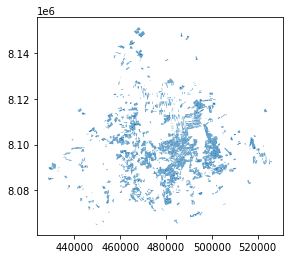

In [35]:
data.plot()
plt.show()

In [36]:
data.crs.name

'WGS 84 / UTM zone 20S'

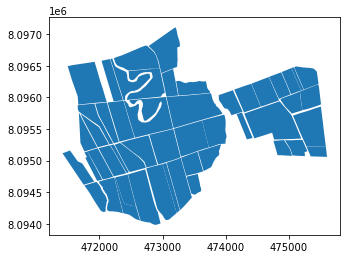

In [37]:
propiedad = data[data['unidad_01']==17]
propiedad.plot()
plt.show()

In [38]:
propiedad.head(3)

,id,unidad_01,unidad_02,unidad_03,unidad_04,unidad_05,variedad,fs,textura,financiami,gestion,soca,cultivo,ins,area,geometry
1119,0000170000C3,17,LA ESTACADA--OLGUITA,8003,AGUILERA RIVERO SERGIO STEFAN,C3,CITTCA 85-22,2020-05-07,FA,IAG,2020,2,canha,50,24.116236,"POLYGON Z ((472922.790 8094188.685 0.000, 4729..."
1120,0000170000C4,17,LA ESTACADA--OLGUITA,8003,AGUILERA RIVERO SERGIO STEFAN,C4,CITTCA 85-22,2020-05-07,FA,IAG,2020,2,canha,50,5.625935,"POLYGON Z ((472333.318 8094343.402 0.000, 4723..."
1121,0000170000B6.2,17,LA ESTACADA--OLGUITA,8003,AGUILERA RIVERO SERGIO STEFAN,B6.2,CITTCA 85-22,2020-04-13,FY,IAG,2020,2,canha,50,7.590585,"POLYGON Z ((473166.109 8096445.273 0.000, 4732..."


In [39]:
propiedad = propiedad.rename(columns={'id':'cod', 'variedad':'var', 'textura':'tex'})
propiedad.head(5)

,cod,unidad_01,unidad_02,unidad_03,unidad_04,unidad_05,var,fs,tex,financiami,gestion,soca,cultivo,ins,area,geometry
1119,0000170000C3,17,LA ESTACADA--OLGUITA,8003,AGUILERA RIVERO SERGIO STEFAN,C3,CITTCA 85-22,2020-05-07,FA,IAG,2020,2,canha,50,24.116236,"POLYGON Z ((472922.790 8094188.685 0.000, 4729..."
1120,0000170000C4,17,LA ESTACADA--OLGUITA,8003,AGUILERA RIVERO SERGIO STEFAN,C4,CITTCA 85-22,2020-05-07,FA,IAG,2020,2,canha,50,5.625935,"POLYGON Z ((472333.318 8094343.402 0.000, 4723..."
1121,0000170000B6.2,17,LA ESTACADA--OLGUITA,8003,AGUILERA RIVERO SERGIO STEFAN,B6.2,CITTCA 85-22,2020-04-13,FY,IAG,2020,2,canha,50,7.590585,"POLYGON Z ((473166.109 8096445.273 0.000, 4732..."
1122,0000170000C10,17,LA ESTACADA--OLGUITA,8003,AGUILERA RIVERO SERGIO STEFAN,C10,RBB 77-26,2020-04-13,FY,IAG,2020,2,canha,50,2.194301,"POLYGON Z ((472197.682 8095204.835 0.000, 4721..."
1123,0000170000C5,17,LA ESTACADA--OLGUITA,8003,AGUILERA RIVERO SERGIO STEFAN,C5,CITTCA 85-22,2020-05-07,FA,IAG,2020,2,canha,50,10.997715,"POLYGON Z ((472152.922 8094712.295 0.000, 4721..."


In [40]:
num_columnas = len(propiedad.columns)
num_columnas

16

In [41]:
propiedad['NOM_LOTE'] = propiedad['unidad_05']
propiedad['TEXTURA'] = propiedad['tex']
propiedad['SUPERFICIE'] = propiedad['area']
propiedad['VARIEDAD'] = propiedad['var']
propiedad['FECHA_SIEM'] = propiedad['fs']
propiedad['CORTE'] = propiedad['soca']
propiedad['ESTADO'] = ''
propiedad['RENDIMIENT'] = 0
propiedad['COD_CA'] = propiedad['unidad_03']
propiedad['COD_PROP'] = propiedad['unidad_01']
propiedad['ID'] = propiedad['cod']
propiedad['CUADRANTE'] = 0

In [42]:
propiedad.head(3)

,cod,unidad_01,unidad_02,unidad_03,unidad_04,unidad_05,var,fs,tex,financiami,...,SUPERFICIE,VARIEDAD,FECHA_SIEM,CORTE,ESTADO,RENDIMIENT,COD_CA,COD_PROP,ID,CUADRANTE
1119,0000170000C3,17,LA ESTACADA--OLGUITA,8003,AGUILERA RIVERO SERGIO STEFAN,C3,CITTCA 85-22,2020-05-07,FA,IAG,...,24.116236,CITTCA 85-22,2020-05-07,2,,0,8003,17,0000170000C3,0
1120,0000170000C4,17,LA ESTACADA--OLGUITA,8003,AGUILERA RIVERO SERGIO STEFAN,C4,CITTCA 85-22,2020-05-07,FA,IAG,...,5.625935,CITTCA 85-22,2020-05-07,2,,0,8003,17,0000170000C4,0
1121,0000170000B6.2,17,LA ESTACADA--OLGUITA,8003,AGUILERA RIVERO SERGIO STEFAN,B6.2,CITTCA 85-22,2020-04-13,FY,IAG,...,7.590585,CITTCA 85-22,2020-04-13,2,,0,8003,17,0000170000B6.2,0


In [43]:
propiedad.columns

Index(['cod', 'unidad_01', 'unidad_02', 'unidad_03', 'unidad_04', 'unidad_05',
       'var', 'fs', 'tex', 'financiami', 'gestion', 'soca', 'cultivo', 'ins',
       'area', 'geometry', 'NOM_LOTE', 'TEXTURA', 'SUPERFICIE', 'VARIEDAD',
       'FECHA_SIEM', 'CORTE', 'ESTADO', 'RENDIMIENT', 'COD_CA', 'COD_PROP',
       'ID', 'CUADRANTE'],
      dtype='object')

In [44]:
propiedad = propiedad.iloc[:,num_columnas-1:]

In [45]:
propiedad.head(5)

,geometry,NOM_LOTE,TEXTURA,SUPERFICIE,VARIEDAD,FECHA_SIEM,CORTE,ESTADO,RENDIMIENT,COD_CA,COD_PROP,ID,CUADRANTE
1119,"POLYGON Z ((472922.790 8094188.685 0.000, 4729...",C3,FA,24.116236,CITTCA 85-22,2020-05-07,2,,0,8003,17,0000170000C3,0
1120,"POLYGON Z ((472333.318 8094343.402 0.000, 4723...",C4,FA,5.625935,CITTCA 85-22,2020-05-07,2,,0,8003,17,0000170000C4,0
1121,"POLYGON Z ((473166.109 8096445.273 0.000, 4732...",B6.2,FY,7.590585,CITTCA 85-22,2020-04-13,2,,0,8003,17,0000170000B6.2,0
1122,"POLYGON Z ((472197.682 8095204.835 0.000, 4721...",C10,FY,2.194301,RBB 77-26,2020-04-13,2,,0,8003,17,0000170000C10,0
1123,"POLYGON Z ((472152.922 8094712.295 0.000, 4721...",C5,FA,10.997715,CITTCA 85-22,2020-05-07,2,,0,8003,17,0000170000C5,0


In [46]:
# dependiendo del año de la fecha de siembra, retorna 'HOJA', 'SOCA' o 'RENOVACION'
def establecer_estado(fecha):
    date = str(fecha)
    try:
        date = datetime.strptime(date, '%Y-%m-%d')
        year = date.year
        if year == 2022:
            return 'HOJA'
        else:
            return 'SOCA'
    except Exception as ex:
        return 'RENOVACION'

In [47]:
def establecer_formato_fecha(fecha):
    fecha = str(fecha)
    if fecha == 'None':
        return '0'
    else:
        return fecha.replace('-', '')

In [48]:
propiedad['ESTADO'] = propiedad['FECHA_SIEM'].apply(establecer_estado)
propiedad['FECHA_SIEM'] = propiedad['FECHA_SIEM'].apply(establecer_formato_fecha)

In [49]:
propiedad

,geometry,NOM_LOTE,TEXTURA,SUPERFICIE,VARIEDAD,FECHA_SIEM,CORTE,ESTADO,RENDIMIENT,COD_CA,COD_PROP,ID,CUADRANTE
1119,"POLYGON Z ((472922.790 8094188.685 0.000, 4729...",C3,FA,24.116236,CITTCA 85-22,20200507,2,SOCA,0,8003,17,0000170000C3,0
1120,"POLYGON Z ((472333.318 8094343.402 0.000, 4723...",C4,FA,5.625935,CITTCA 85-22,20200507,2,SOCA,0,8003,17,0000170000C4,0
1121,"POLYGON Z ((473166.109 8096445.273 0.000, 4732...",B6.2,FY,7.590585,CITTCA 85-22,20200413,2,SOCA,0,8003,17,0000170000B6.2,0
1122,"POLYGON Z ((472197.682 8095204.835 0.000, 4721...",C10,FY,2.194301,RBB 77-26,20200413,2,SOCA,0,8003,17,0000170000C10,0
1123,"POLYGON Z ((472152.922 8094712.295 0.000, 4721...",C5,FA,10.997715,CITTCA 85-22,20200507,2,SOCA,0,8003,17,0000170000C5,0
2813,"POLYGON Z ((473278.370 8094217.950 0.000, 4732...",C1,FA,16.756811,CITTCA 85-22,20210407,1,SOCA,0,1215,17,0000170000C1,0
2814,"POLYGON Z ((473222.431 8094170.786 0.000, 4731...",C2.1,FA,22.336506,UCG 90-20,20220315,0,HOJA,0,515,17,0000170000C2.1,0
2815,"POLYGON Z ((471762.355 8094606.906 0.000, 4719...",C6,FA,8.288967,RBB 77-26,20160606,6,SOCA,0,515,17,0000170000C6,0
2816,"POLYGON Z ((471588.376 8094859.892 0.000, 4714...",C7,FA,9.159677,UCG 90-20,20210415,1,SOCA,0,1215,17,0000170000C7,0
2817,"POLYGON Z ((472102.696 8094960.349 0.000, 4722...",C8,FY,8.465402,RBB 77-26,20200425,2,SOCA,0,8003,17,0000170000C8,0


In [50]:
fp_tch = r'D:\OneDrive - Ingenio Azucarero Guabira S.A\UTEA_2022\APP CAÑERO\PROPIEDADES\DATOS_PARA_GENERAR_GEOJSON\RENDIMIENTO AVANCE 071022.xlsx'

In [51]:
tchs = pd.read_excel(fp_tch)

In [52]:
def cargar_tch(cod_ca):
    tch = float(tchs[tchs['CODIGO CAÑERO '] == cod_ca].iloc[:,16])
    try:
        tch_float = float(tch)
        return tch_float
    except:
        return 0

In [53]:
propiedad['RENDIMIENT'] = propiedad['COD_CA'].apply(cargar_tch)
propiedad.head(3)

,geometry,NOM_LOTE,TEXTURA,SUPERFICIE,VARIEDAD,FECHA_SIEM,CORTE,ESTADO,RENDIMIENT,COD_CA,COD_PROP,ID,CUADRANTE
1119,"POLYGON Z ((472922.790 8094188.685 0.000, 4729...",C3,FA,24.116236,CITTCA 85-22,20200507,2,SOCA,50.058121,8003,17,0000170000C3,0
1120,"POLYGON Z ((472333.318 8094343.402 0.000, 4723...",C4,FA,5.625935,CITTCA 85-22,20200507,2,SOCA,50.058121,8003,17,0000170000C4,0
1121,"POLYGON Z ((473166.109 8096445.273 0.000, 4732...",B6.2,FY,7.590585,CITTCA 85-22,20200413,2,SOCA,50.058121,8003,17,0000170000B6.2,0


In [54]:
fp_bloques = r'D:\OneDrive - Ingenio Azucarero Guabira S.A\UTEA_2022\APP CAÑERO\PROPIEDADES\DATOS_PARA_GENERAR_GEOJSON\BLOQUES.xlsx'

In [55]:
bloques = pd.read_excel(fp_bloques)

In [56]:
bloques.head(3)

,idnax,id,unidad_01,unidad_02,unidad_03,unidad_04,unidad_05,variedad,fs,fc,...,agua_disp,agua_aprov,agua_act,estrato,tipo_cos,resiembra_pct,fk_pixel,activo,fk_estacion,inicio_curva
0,276044,00005600000L1.3,560,LA_TUJA_IAG_SA,15284,ROJAS_CORDOVA_ROGELIO_FELIPE,L1.3,UCG_90-20,44038,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,618227,True,NaN,NaN
1,276045,00005600000L1.5,560,LA_TUJA_IAG_SA,15284,ROJAS_CORDOVA_ROGELIO_FELIPE,L1.5,UCG_90-20,44431,44431.0,...,NaN,NaN,NaN,NaN,NaN,NaN,618227,True,NaN,NaN
2,276046,00005600000L2.2,560,LA_TUJA_IAG_SA,15284,ROJAS_CORDOVA_ROGELIO_FELIPE,L2.2,CITTCA_85-22,44431,44431.0,...,NaN,NaN,NaN,NaN,NaN,NaN,618227,True,NaN,NaN


In [57]:
def cargar_bloque(cod_prop):
    bloque = bloques[bloques['unidad_01']==30].head(1).loc[:,'cuadrante']
    try:
        bloque_int = int(bloque)
        return bloque_int
    except:
        return 0

In [58]:
propiedad['CUADRANTE']=propiedad['COD_PROP'].apply(cargar_bloque)
propiedad..head(3)

,geometry,NOM_LOTE,TEXTURA,SUPERFICIE,VARIEDAD,FECHA_SIEM,CORTE,ESTADO,RENDIMIENT,COD_CA,COD_PROP,ID,CUADRANTE
1119,"POLYGON Z ((472922.790 8094188.685 0.000, 4729...",C3,FA,24.116236,CITTCA 85-22,20200507,2,SOCA,50.058121,8003,17,0000170000C3,358
1120,"POLYGON Z ((472333.318 8094343.402 0.000, 4723...",C4,FA,5.625935,CITTCA 85-22,20200507,2,SOCA,50.058121,8003,17,0000170000C4,358
1121,"POLYGON Z ((473166.109 8096445.273 0.000, 4732...",B6.2,FY,7.590585,CITTCA 85-22,20200413,2,SOCA,50.058121,8003,17,0000170000B6.2,358
1122,"POLYGON Z ((472197.682 8095204.835 0.000, 4721...",C10,FY,2.194301,RBB 77-26,20200413,2,SOCA,50.058121,8003,17,0000170000C10,358
1123,"POLYGON Z ((472152.922 8094712.295 0.000, 4721...",C5,FA,10.997715,CITTCA 85-22,20200507,2,SOCA,50.058121,8003,17,0000170000C5,358
2813,"POLYGON Z ((473278.370 8094217.950 0.000, 4732...",C1,FA,16.756811,CITTCA 85-22,20210407,1,SOCA,50.058121,1215,17,0000170000C1,358
2814,"POLYGON Z ((473222.431 8094170.786 0.000, 4731...",C2.1,FA,22.336506,UCG 90-20,20220315,0,HOJA,50.058121,515,17,0000170000C2.1,358
2815,"POLYGON Z ((471762.355 8094606.906 0.000, 4719...",C6,FA,8.288967,RBB 77-26,20160606,6,SOCA,50.058121,515,17,0000170000C6,358
2816,"POLYGON Z ((471588.376 8094859.892 0.000, 4714...",C7,FA,9.159677,UCG 90-20,20210415,1,SOCA,50.058121,1215,17,0000170000C7,358
2817,"POLYGON Z ((472102.696 8094960.349 0.000, 4722...",C8,FY,8.465402,RBB 77-26,20200425,2,SOCA,50.058121,8003,17,0000170000C8,358


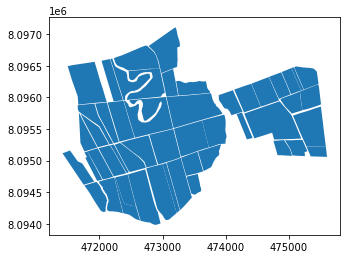

In [59]:
propiedad.plot()
plt.show()

In [60]:
propiedad.crs

<Projected CRS: EPSG:32720>
Name: WGS 84 / UTM zone 20S
Axis Info [cartesian]:
- E[east]: Easting (metre)
- N[north]: Northing (metre)
Area of Use:
- name: Between 66°W and 60°W, southern hemisphere between 80°S and equator, onshore and offshore. Argentina. Bolivia. Brazil. Falkland Islands (Malvinas). Paraguay.
- bounds: (-66.0, -80.0, -60.0, 0.0)
Coordinate Operation:
- name: UTM zone 20S
- method: Transverse Mercator
Datum: World Geodetic System 1984 ensemble
- Ellipsoid: WGS 84
- Prime Meridian: Greenwich

In [61]:
propiedad = propiedad.to_crs(epsg=4326)

In [62]:
propiedad.crs

<Geographic 2D CRS: EPSG:4326>
Name: WGS 84
Axis Info [ellipsoidal]:
- Lat[north]: Geodetic latitude (degree)
- Lon[east]: Geodetic longitude (degree)
Area of Use:
- name: World.
- bounds: (-180.0, -90.0, 180.0, 90.0)
Datum: World Geodetic System 1984 ensemble
- Ellipsoid: WGS 84
- Prime Meridian: Greenwich

In [63]:
outfp = r"D:\OneDrive - Ingenio Azucarero Guabira S.A\UTEA_2022\APP CAÑERO\PROPIEDADES\DATOS_PARA_GENERAR_GEOJSON\SPH_WGS84\LA_ESTACADA.geojson"
propiedad.to_file(outfp, driver='GeoJSON')